## Ni の強磁性相転移

DSC のデータは測定装置の都合上符号が逆になっている。

## ライブラリのインポート

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.path import Path

## 関数

In [ ]:
def SimpsonIntegral(x, y, start_index = 0, end_index = 3899):
    dx    = x[1]-x[0]
    res = np.array([])
    for time_index in range(start_index, end_index):
        integrated_value = dx/3 * (y[start_index] + 2*np.sum(y[start_index:time_index:2]) + 4*np.sum(y[start_index+1:time_index:2]) + y[time_index])
        res = np.append(res, integrated_value)
    return res

def MidpointIntefral(x, y, start_index = 0, end_index = 3899):
    dx    = x[1]-x[0]
    res = np.array([])
    for time_index in range(start_index, end_index):
        integrated_value = dx * np.sum(y[start_index:time_index])
        res = np.append(res, integrated_value)
    return res

def calcDelta_heating(Time, Delta, Temp, start_index, end_index):

    # res1=np.polyfit(Time[end_index:end_index+100], Delta[end_index:end_index+100], 1)
    res1=[(Delta[end_index]-Delta[start_index])/(Time[end_index]-Time[start_index])]
    res1.append(Delta[start_index]-res1[0]*Time[start_index])

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.set_xlim(Temp[start_index-100],Temp[end_index+100])
    ax1.set_ylim(np.min(Delta[start_index:end_index])*0.95,np.max(Delta[start_index:end_index])*1.05)
    ax1.set_xlabel("Temperature (K)")
    ax1.set_ylabel("Delta")

    ax1.plot(Temp[start_index-100:end_index+100], Delta[start_index-100:end_index+100], c="tab:orange")
    ax1.plot(Temp[start_index-100:end_index+100], res1[0]*Time[start_index-100:end_index+100]+res1[1], c="tab:red")

    ax1.scatter(Temp[start_index], Delta[start_index], c="tab:green")
    ax1.scatter(Temp[end_index], Delta[end_index], c="tab:green")

    Integral_val = MidpointIntefral(Time, Delta-(res1[0]*Time+res1[1]), start_index, end_index)
    Integral_val -=np.min(Integral_val)

    ax2 = ax1.twinx()
    ax2.set_ylabel("Integral")
    ax2.plot(Temp[start_index:end_index], Integral_val, c = "tab:blue")
    ax1.set_title("Delta = {:.3f}".format(np.max(Integral_val)))
    plt.show()
    return np.max(Integral_val)

def calcDelta_cooling(Time, Delta, Temp, start_index, end_index):

    res1=[(Delta[end_index]-Delta[start_index])/(Time[end_index]-Time[start_index])]
    res1.append(Delta[start_index]-res1[0]*Time[start_index])

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.set_xlim(Temp[end_index+200],Temp[start_index-200])
    ax1.set_ylim(np.min(Delta[start_index:end_index])*0.95,np.max(Delta[start_index:end_index])*1.05)
    ax1.set_xlabel("Temperature (K)")
    ax1.set_ylabel("Delta")

    ax1.plot(Temp[start_index-200:end_index+200], Delta[start_index-200:end_index+200], c="tab:orange")
    ax1.plot(Temp[start_index-200:end_index+200], res1[0]*Time[start_index-200:end_index+200]+res1[1], c="tab:red")
    ax1.scatter(Temp[start_index], Delta[start_index], c="tab:green")
    ax1.scatter(Temp[end_index], Delta[end_index], c="tab:green")

    Integral_val = MidpointIntefral(Time, Delta-(res1[0]*Time+res1[1]), start_index, end_index)
    Integral_val -=np.min(Integral_val)

    ax2 = ax1.twinx()
    # ax2.set_ylim(np.min(Integral_val),np.max(Integral_val))
    ax2.set_ylabel("Integral")
    ax2.plot(Temp[start_index:end_index], Integral_val, c = "tab:blue")
    ax1.set_title("Delta = {:.3f}".format(np.max(Integral_val)))
    plt.show()
    return np.max(Integral_val)

def SgFilterDerv(x, y):
    dx = x[1]-x[0]
    res = (86*y[0:-9] - 142*y[1:-8] - 193*y[2:-7] - 126*y[3:-6]
          -86*y[8:-1] + 142*y[7:-2] + 193*y[6:-3] + 126*y[5:-4] )/(dx * 1188)
    return res


## 測定データのインポート

In [3]:
df = pd.read_csv("2024_11_15/TGS.csv",
                encoding = 'shift_jis',
                skiprows = 30,
                usecols  = [0, 1, 2])

                                                                     # 単位
Time = df.iloc[:,0].to_numpy() * 60                                  # sec
Temp = df.iloc[:,1].to_numpy() + 273.15                              # K
Dsc  =-df.iloc[:,2].to_numpy() * 10**(-6)                            # W

del df

In [4]:
mass = 9.2 * 10**(-3) # g
Cp   = Dsc[4:-5]/SgFilterDerv(Time,Temp)/mass  # J/g・K
mol  = mass / 323.28
dHdt = Dsc / mol
dSdt = dHdt / Temp

## プロット

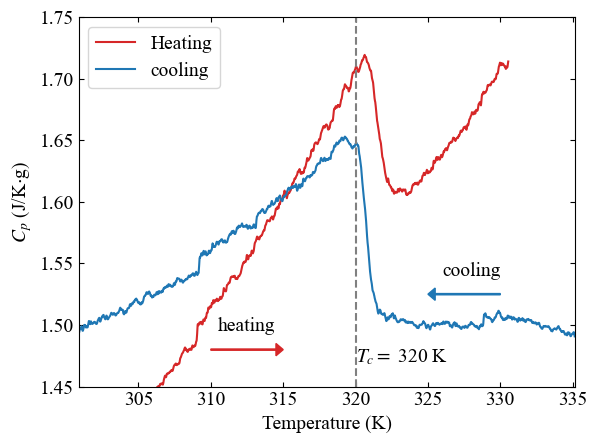

In [25]:
f = plt.figure()
ax1 = f.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

xlim = (Temp[8500], Temp[6500])
ax1.set_xlim(xlim[0], xlim[1])
ylim = (1.45, 1.75)
ax1.set_ylim(ylim[0], ylim[1])

ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("$C_p$ (J/K$\cdot$g)")
ax1.plot(Temp[3000:4500], Cp[3000:4500], label="Heating", color = "tab:red")
ax1.arrow(310, 1.48, 5, 0,
          width = 0.001, head_width = 0.01, head_length = 0.5, length_includes_head=True, color="tab:red")
ax1.text(310.5, 1.495, "heating")

ax1.plot(Temp[6500:8500], Cp[6500:8500], label="cooling", color = "tab:blue")
ax1.arrow(330, 1.525, -5, 0,
          width = 0.001, head_width = 0.01, head_length = 0.5, length_includes_head=True, color="tab:blue")
ax1.text(326, 1.54, "cooling")

ax1.text(320, 1.47, "$T_{c}=$ 320 K")
ax1.vlines(320, ylim[0], ylim[1], linestyles = "dashed", color ="grey")

ax1.legend()

plt.show()
# del f, ax1, xlim, ylim

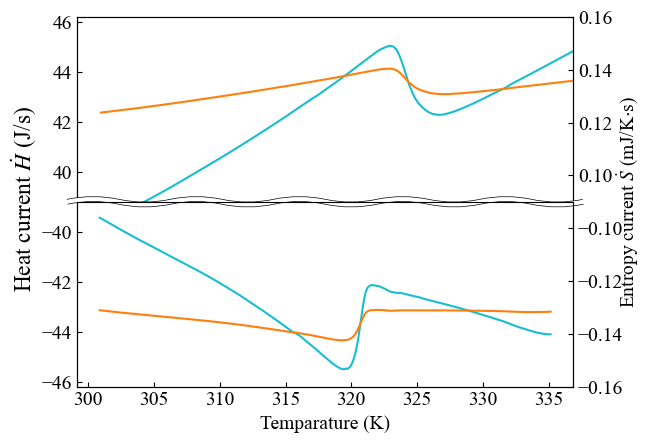

In [43]:
fig = plt.figure()
ax1H = fig.add_subplot(211)
ax1H.set_xlim(305, 330)
ax1H.set_ylim(39-0.2, 46+0.2)

ax1H.plot(Temp[3000:4500], dHdt[3000:4500], c="tab:cyan")

ax1S = ax1H.twinx()
ax1S.set_ylim(0.12-0.03, 0.14+0.02)
ax1S.plot(Temp[3000:4500], dSdt[3000:4500], c="tab:orange")

ax2H = fig.add_subplot(212)
ax2H.set_xlabel("Temparature (K)")
# ax2H.set_xlim(305, 330)
ax2H.set_ylim(-46-0.2, -39+0.2)
ax2H.plot(Temp[6500:8500], dHdt[6500:8500], c="tab:cyan")

ax2S = ax2H.twinx()
ax2S.set_ylim(-0.14-0.02, -0.12+0.03)
ax2S.plot(Temp[6500:8500], dSdt[6500:8500], c="tab:orange")

fig.subplots_adjust(hspace=0)
ax1H.tick_params(labelbottom = False, bottom = False)
ax1H.spines["bottom"].set_visible(False)
ax2H.spines["top"].set_visible(False)

d1 = 0.02 # X軸のはみだし量
d2 = 0.03 # ニョロ波の高さ
wn = 21   # ニョロ波の数（奇数値を指定）

pp = (0,d2,0,-d2)
px = np.linspace(-d1,1+d1,wn)
py = np.array([1+pp[i%4] for i in range(0,wn)])
p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))

line1 = mpatches.PathPatch(p, lw=4, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=ax2H.transAxes, zorder=10)

line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=ax2H.transAxes, zorder=10,
                           capstyle='round')

a = ax2H.add_patch(line1)
a = ax2H.add_patch(line2)

fig.supylabel("Heat current $\dot{H}$ (J/s)")

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
[ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
ax.patch.set_visible(False)
ax.yaxis.set_label_position('right')
ax.set_ylabel('Entropy current $\dot{S}$ (mJ/K$\cdot$s)', labelpad=30)

plt.show()

# del a, ax, ax1H, ax1S, ax2H, ax2S, d1, d2, fig, line1, line2, p, pp, px, py, wn

## 転移熱

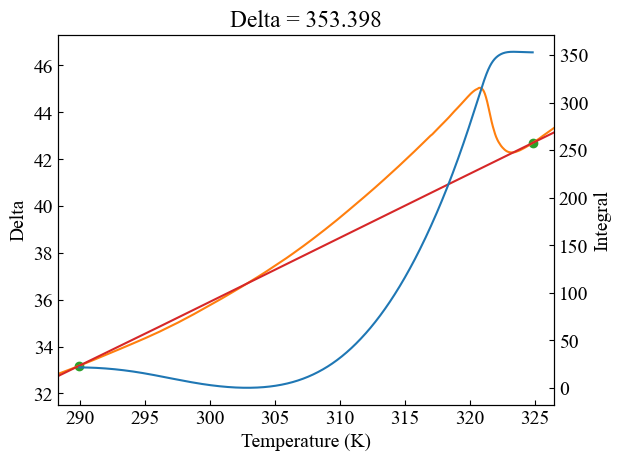

353.39787732065014


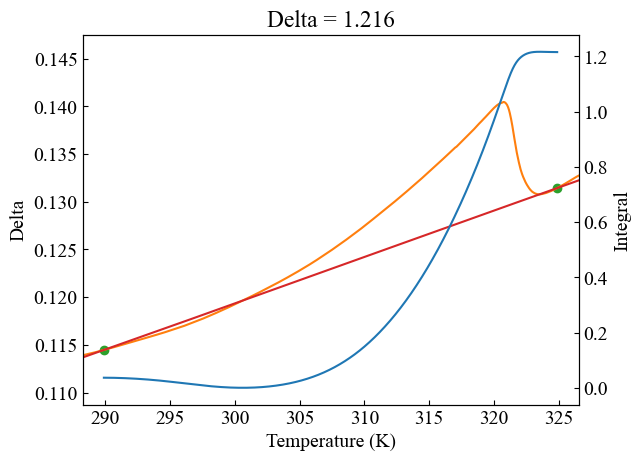

1.2162308678344869


In [63]:
print(calcDelta_heating(Time, dHdt, Temp, 2000, 4150))
print(calcDelta_heating(Time, dSdt, Temp, 2000, 4150))

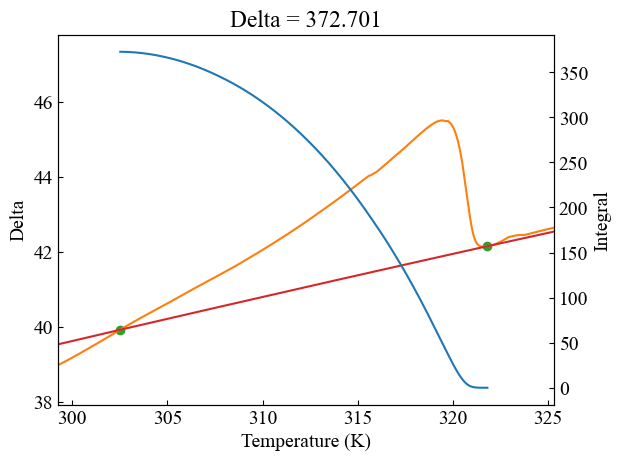

372.70149973780457


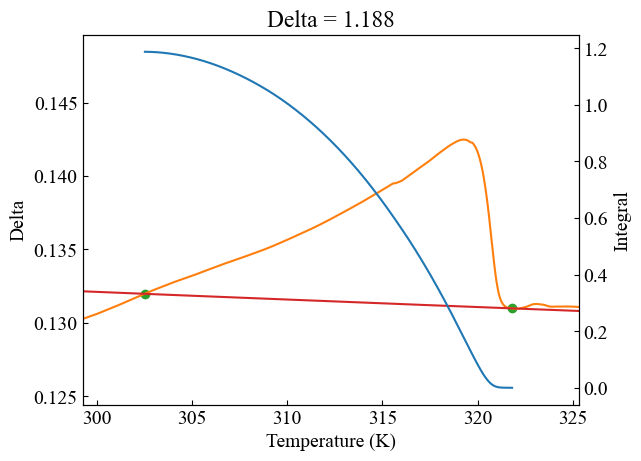

1.1878397209552376


In [70]:
print(calcDelta_cooling(Time, -dHdt, Temp, 7250, 8400))
print(calcDelta_cooling(Time, -dSdt, Temp, 7250, 8400))